Text(0.5, 1.0, 'Original image.')

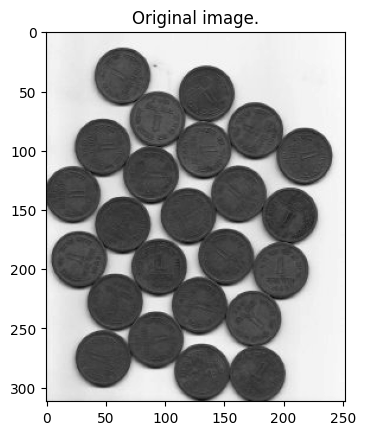

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image segmentation with Otsu thresholding
image = cv2.imread('Images/water_coins.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.title('Original image.')


Text(0.5, 1.0, 'Image segmentation with Otsu thresholding.')

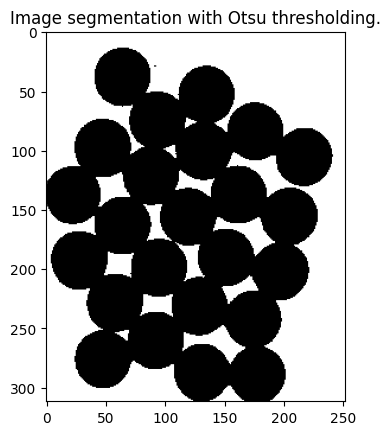

In [2]:
counts, x = np.histogram(image, bins=16)
thresh, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(2)
plt.imshow(otsu, cmap='gray')
plt.title('Image segmentation with Otsu thresholding.')


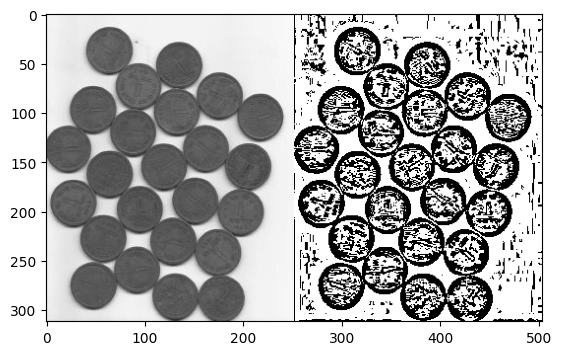

In [3]:

# Adaptive thresholding
I = cv2.imread('Images/water_coins.jpg', cv2.IMREAD_GRAYSCALE)
T = cv2.adaptiveThreshold(I, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 0.4)
plt.figure()
plt.imshow(np.hstack((I, T)), cmap='gray')


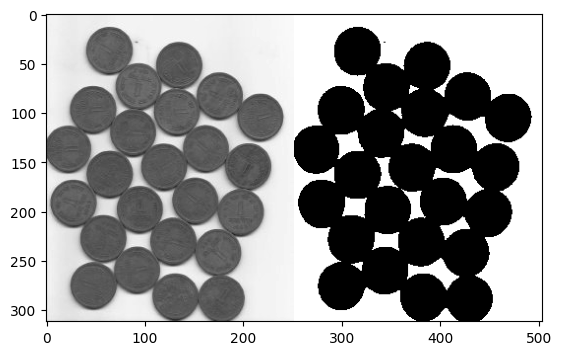

In [4]:
# Global thresholding
I = cv2.imread('Images/water_coins.jpg', cv2.IMREAD_GRAYSCALE)
_, BW = cv2.threshold(I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure()
plt.imshow(np.hstack((I, BW)), cmap='gray')


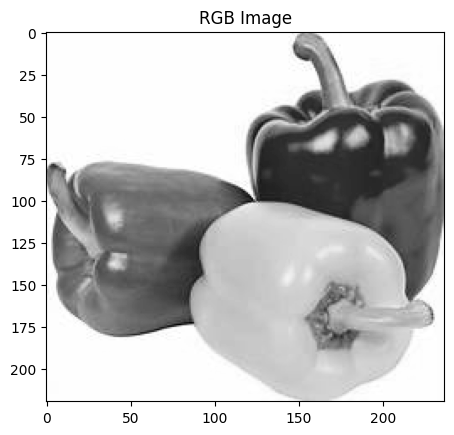

In [5]:
# Global thresholding with multithresh
I = cv2.imread('Images/peppers.jpeg')
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('RGB Image')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, cmap='gray')


169.0


"\nlabels = cv2.ximgproc.segmentation.createGraphSegmentation(I, sigma=0.5, k=400, min_size=50)\nlabels = labels.reshape(I.shape)\nlabelsRGB = cv2.cvtColor(labels, cv2.COLOR_GRAY2RGB)\nplt.imshow(labelsRGB)\nplt.title('Segmented Image')\n"

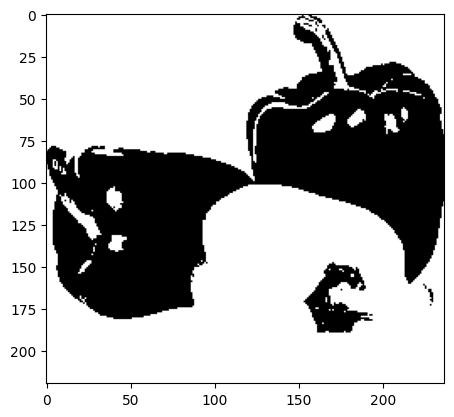

In [6]:
res, thresh = cv2.threshold(I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(res)
plt.imshow(thresh, cmap="gray")
"""
labels = cv2.ximgproc.segmentation.createGraphSegmentation(I, sigma=0.5, k=400, min_size=50)
labels = labels.reshape(I.shape)
labelsRGB = cv2.cvtColor(labels, cv2.COLOR_GRAY2RGB)
plt.imshow(labelsRGB)
plt.title('Segmented Image')
"""

C:\Users\ganga\AppData\Local\Temp\ipykernel_37452\3845997667.py:23: RuntimeWarning: overflow encountered in scalar subtract
  if visited[x, y] == 0 and np.abs(I[x, y] - I[seed_x, seed_y]) <= reg_maxdist:


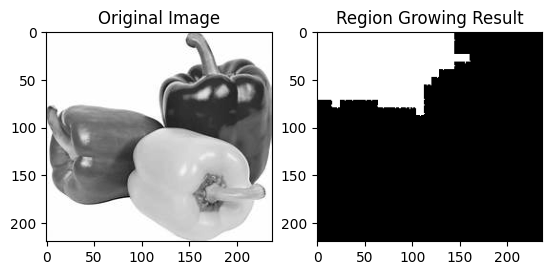

In [7]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the image
I = cv2.imread('Images/peppers.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the seed point for region growing (you can select it interactively or hardcode the coordinates)
seed_x = 10
seed_y = 50

# Set the region growing threshold
reg_maxdist = 0.2

# Create a binary mask for the segmented region
visited = np.zeros_like(I)
seed = [(seed_x, seed_y)]
regions = []

while seed:
    x, y = seed.pop()
    if visited[x, y] == 0 and np.abs(I[x, y] - I[seed_x, seed_y]) <= reg_maxdist:
        visited[x, y] = 1
        regions.append((x, y))
        if x > 0:
            seed.append((x - 1, y))
        if x < I.shape[0] - 1:
            seed.append((x + 1, y))
        if y > 0:
            seed.append((x, y - 1))
        if y < I.shape[1] - 1:
            seed.append((x, y + 1))

# Create a binary mask from the segmented region
binary_mask = np.zeros_like(I)
for x, y in regions:
    binary_mask[x, y] = 255

# Display the segmented region
plt.figure()
plt.subplot(121)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(binary_mask, cmap='gray')
plt.title('Region Growing Result')

plt.show()